# IPL Exploratory Data Analysis (EDA)

This notebook performs exploratory data analysis on IPL match and ball-by-ball data
to understand trends, patterns, and insights before building prediction models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [2]:
matches = pd.read_csv("../data/matches.csv")
deliveries = pd.read_csv("../data/deliveries.csv")


In [3]:
matches.head()
deliveries.head()


match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0           1     legbyes          0              NaN            NaN     NaN  
1           0         NaN          0              NaN            NaN     NaN  
2           1       wides          0              NaN            NaN     NaN  
3           0         NaN          0              NaN            NaN     NaN  
4           0         NaN          0              NaN            NaN     NaN

In [4]:
print("Matches Shape:", matches.shape)
print("Deliveries Shape:", deliveries.shape)
matches.info()

Matches Shape: (1095, 20)
Deliveries Shape: (260920, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  sup

In [5]:
matches.isnull().sum().sort_values(ascending=False)
deliveries.isnull().sum().head(10)


match_id        0
inning          0
batting_team    0
bowling_team    0
over            0
ball            0
batter          0
bowler          0
non_striker     0
batsman_runs    0
dtype: int64

### Missing Values Observation
Some columns contain missing values which will be handled
during the data cleaning phase.


In [6]:
plt.figure(figsize=(8,4))
matches['season'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Matches Played per Season")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.show()


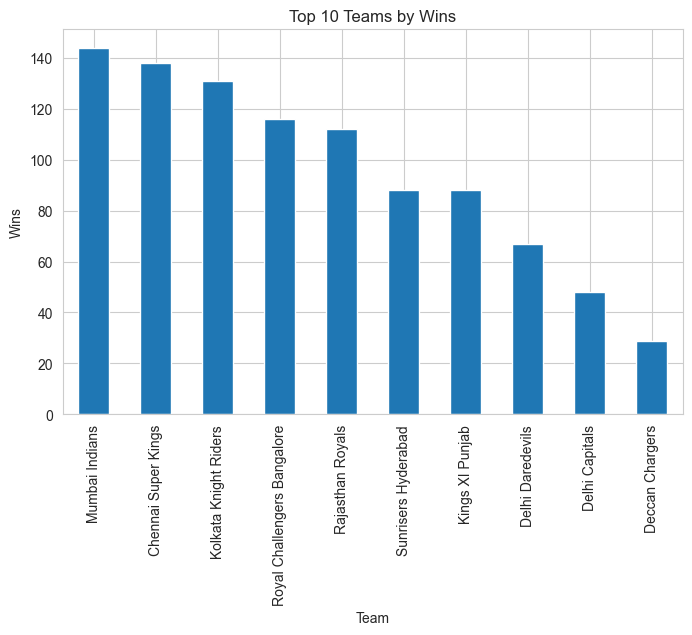

In [7]:
plt.figure(figsize=(8,5))
matches['winner'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Teams by Wins")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.show()


In [8]:
sns.countplot(x='toss_decision', data=matches)
plt.title("Toss Decision Distribution")
plt.show()


Total Super Over Matches: 0


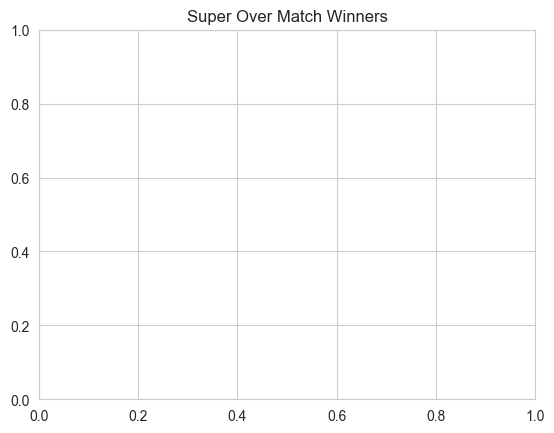

In [9]:
super_over = matches[matches['super_over'] == 1]
print("Total Super Over Matches:", super_over.shape[0])
sns.countplot(y='winner', data=super_over)
plt.title("Super Over Match Winners")
plt.show()


In [10]:
high_scores = matches[matches['target_runs'] >= 200]
print("200+ Target Matches:", high_scores.shape[0])
sns.histplot(high_scores['target_runs'], bins=20)
plt.title("High Scoring Matches Distribution (200+)")
plt.show()


200+ Target Matches: 152


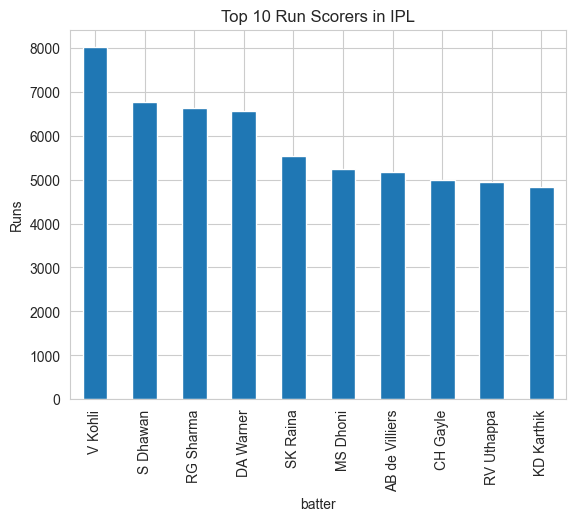

In [11]:
top_batsmen = deliveries.groupby('batter')['batsman_runs'] \
                        .sum() \
                        .sort_values(ascending=False) \
                        .head(10)

top_batsmen.plot(kind='bar')
plt.title("Top 10 Run Scorers in IPL")
plt.ylabel("Runs")
plt.show()


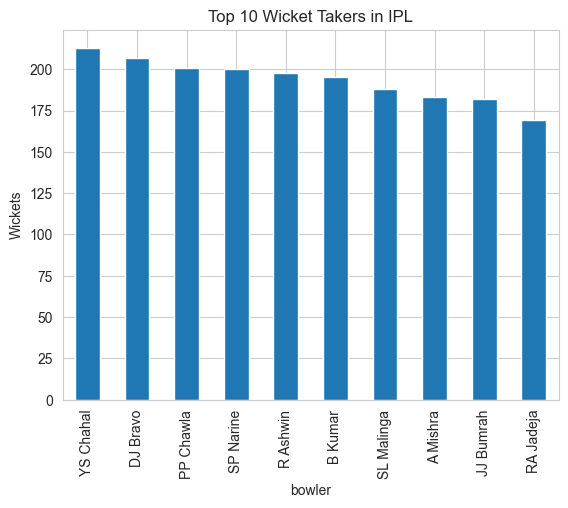

In [12]:
top_bowlers = deliveries.groupby('bowler')['is_wicket'] \
                        .sum() \
                        .sort_values(ascending=False) \
                        .head(10)

top_bowlers.plot(kind='bar')
plt.title("Top 10 Wicket Takers in IPL")
plt.ylabel("Wickets")
plt.show()


In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(
    matches[['season','result_margin','target_runs']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Feature Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: '2007/08'

<Figure size 600x400 with 0 Axes>

## Key Insights from EDA

1. Mumbai Indians and Chennai Super Kings are the most successful teams.
2. Fielding first is the most preferred toss decision.
3. High scoring matches (200+) have increased in recent seasons.
4. Certain players consistently dominate batting and bowling charts.
5. Super over matches are rare but impactful.
